**Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

**Loading the Dataset**

In [4]:
data = pd.read_excel("Bank Transactions Dataset for Fraud Detection.xlsx")

print(data)

     Transaction ID Account ID  Transaction Amount    Transaction Date  \
0          TX000001    AC00128               14.09 2023-04-11 16:29:14   
1          TX000002    AC00455              376.24 2023-06-27 16:44:19   
2          TX000003    AC00019              126.29 2023-07-10 18:16:08   
3          TX000004    AC00070              184.50 2023-05-05 16:32:11   
4          TX000005    AC00411               13.45 2023-10-16 17:51:24   
...             ...        ...                 ...                 ...   
2507       TX002508    AC00297              856.21 2023-04-26 17:09:36   
2508       TX002509    AC00322              251.54 2023-03-22 17:36:48   
2509       TX002510    AC00095               28.63 2023-08-21 17:08:50   
2510       TX002511    AC00118              185.97 2023-02-24 16:24:46   
2511       TX002512    AC00009              243.08 2023-02-14 16:21:23   

     Transaction Type          Location Device ID      IP Address Merchant ID  \
0               Debit         

**Overview**

In [31]:
print("Shape:", data.shape)
print("\nTypes:\n", data.dtypes)
print("\nMissing:\n", data.isnull().sum())
print("\nHead:\n", data.head())
print("\nDescriptive Statistics:\n", data.describe())

Shape: (2512, 16)

Types:
 Transaction ID                       object
Account ID                           object
Transaction Amount                  float64
Transaction Date             datetime64[ns]
Transaction Type                     object
Location                             object
Device ID                            object
IP Address                           object
Merchant ID                          object
Channel                              object
Customer Age                          int64
Customer Occupation                  object
Transaction Duration                  int64
Login Attempts                        int64
Account Balance                     float64
Previous Transaction Date    datetime64[ns]
dtype: object

Missing:
 Transaction ID               0
Account ID                   0
Transaction Amount           0
Transaction Date             0
Transaction Type             0
Location                     0
Device ID                    0
IP Address                 

**Check Unique Value Counts for Key Identifiers**

In [33]:
data[['Account ID', 'Device ID', 'Location', 'Merchant ID']].nunique()


Account ID     495
Device ID      681
Location        43
Merchant ID    100
dtype: int64

**Exploratory Data Analysis**

**Transaction Amount Distribution**

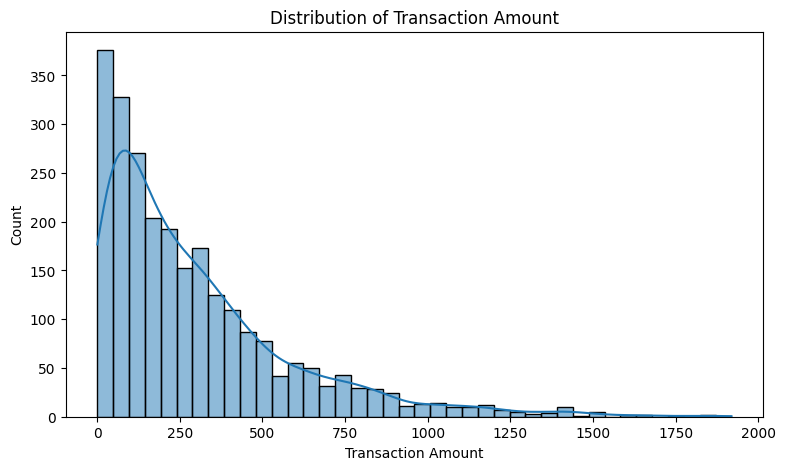

In [355]:
plt.figure(figsize=(9, 5))
sns.histplot(data, x = "Transaction Amount", kde = True)
plt.title("Distribution of Transaction Amount")
plt.show() 

**Distribution of Transaction Types**

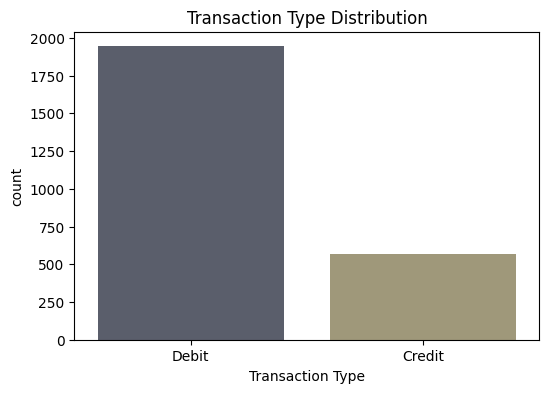

In [117]:
plt.figure(figsize = (6, 4))
sns.countplot(data, x = "Transaction Type", palette = "cividis")
plt.title("Transaction Type Distribution")
plt.show()

**Transaction Amount Distribution and Outliers**

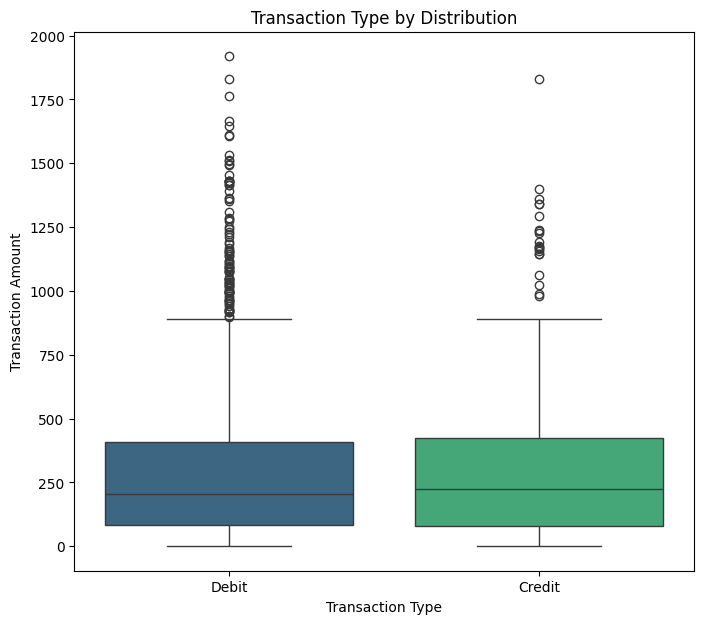

In [132]:
plt.figure(figsize = (8, 7))
sns.boxplot(data, x = "Transaction Type", y = "Transaction Amount", palette = "viridis")
plt.title("Transaction Type by Distribution")
plt.show()

**Transaction Amount by Age Range (Customer Demographics)**

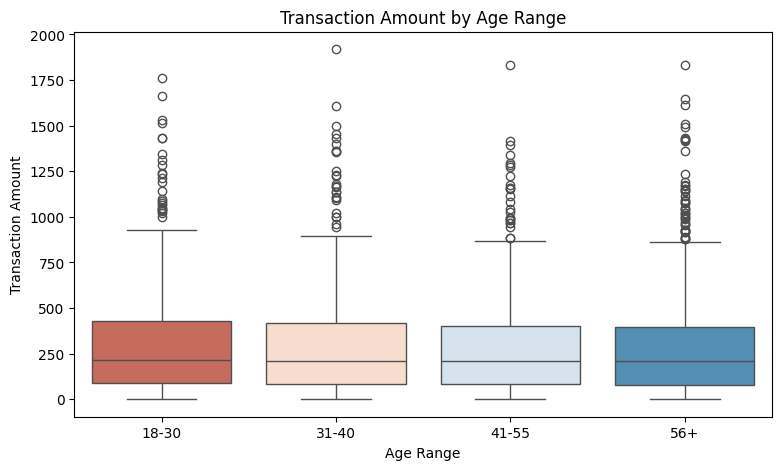

In [159]:
data["Age Range"] = pd.cut(data["Customer Age"], bins = [0, 25, 40, 55, 100], labels = ["18-30", "31-40", "41-55", "56+"])
plt.figure(figsize = (9, 5))
sns.boxplot(data, x = "Age Range", y = "Transaction Amount", palette = "RdBu")
plt.title("Transaction Amount by Age Range")
plt.show()

**Daily Transaction Count (Time-based Analysis)**

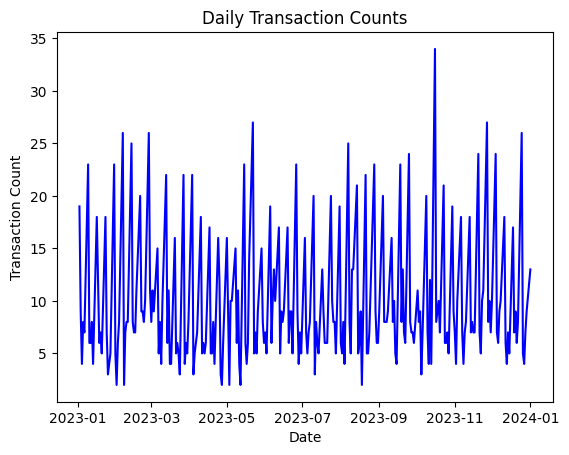

In [186]:
data["Transaction Date"] = pd.to_datetime(data["Transaction Date"])
data["Transaction Day"] = data["Transaction Date"].dt.date
daily_counts = data.groupby("Transaction Day").size()
daily_counts.plot(title="Daily Transaction Counts", color= "blue", linewidth = 1.5)
plt.xlabel("Date")
plt.ylabel("Transaction Count")
plt.show()

**Transaction Count by Day of the Week**

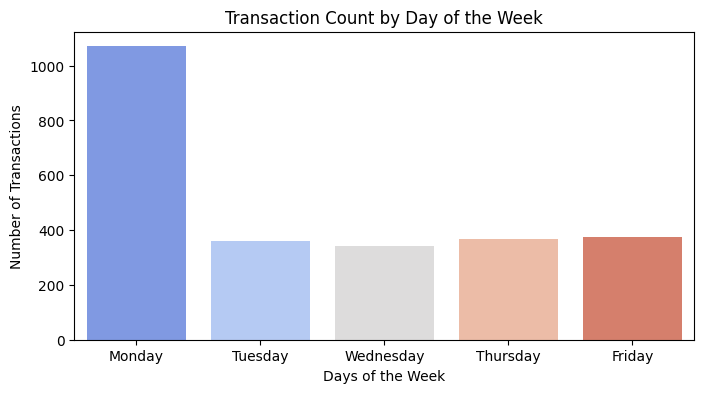

In [210]:
data["Transaction Date"] = pd.to_datetime(data["Transaction Date"])
data["DayOfWeek"] = data["Transaction Date"].dt.day_name() 

plt.figure(figsize = (8, 4))
sns.countplot(data, x = "DayOfWeek", order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"], palette = "coolwarm")
plt.title("Transaction Count by Day of the Week")
plt.xlabel("Days of the Week")
plt.ylabel("Number of Transactions")
plt.show()

**Analyzing Transaction Times for Anomalies**

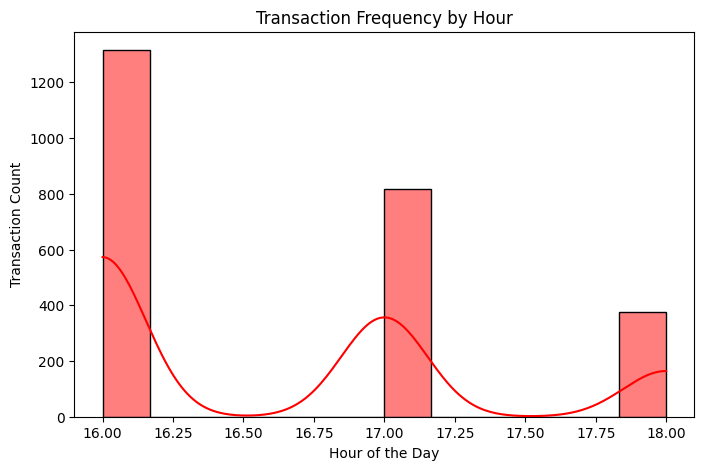

In [230]:
data["Hour"] = data["Transaction Date"].dt.hour

plt.figure(figsize = (8, 5))
sns.histplot(data, x = "Hour", kde = True, bins = 12, color = "red")
plt.title("Transaction Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Count")
plt.show()

**Top Locations by Transaction Volume**

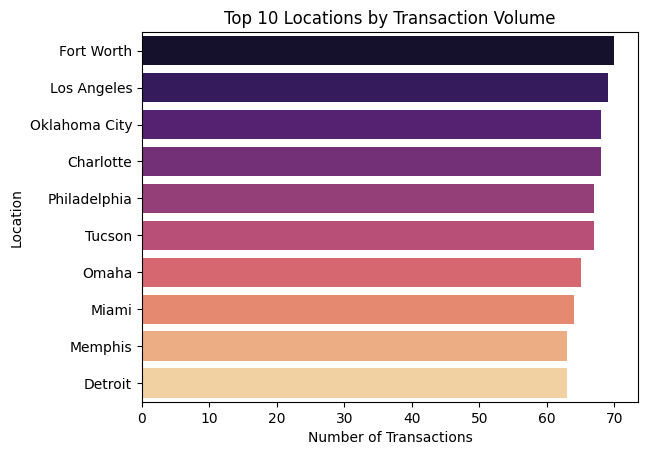

In [241]:
top_locations = data["Location"].value_counts().head(10)

sns.barplot(x = top_locations.values, y = top_locations.index, palette = "magma")
plt.title("Top 10 Locations by Transaction Volume")
plt.xlabel("Number of Transactions")
plt.ylabel("Location")
plt.show()

**Customer Age Distribution by Transaction Type**

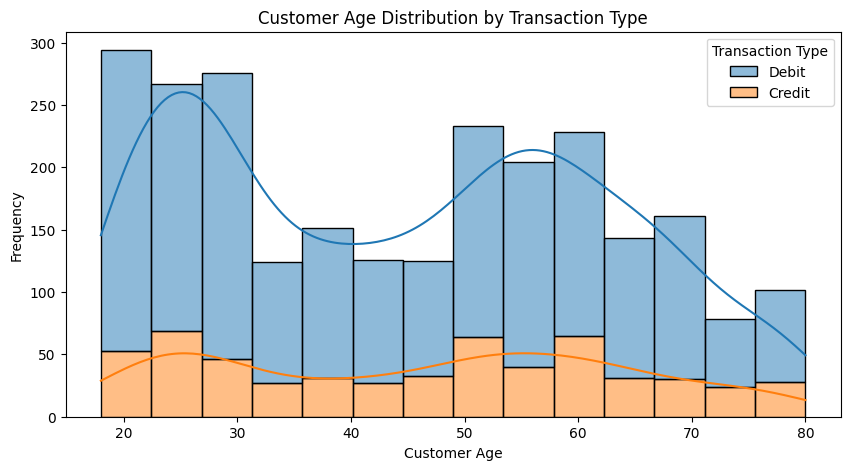

In [254]:
plt.figure(figsize = (10, 5))
sns.histplot(data, x = "Customer Age", hue = "Transaction Type", multiple = "stack", kde = True)
plt.title("Customer Age Distribution by Transaction Type")
plt.xlabel("Customer Age")
plt.ylabel("Frequency")
plt.show()

**Account Balance vs Transaction Amount**

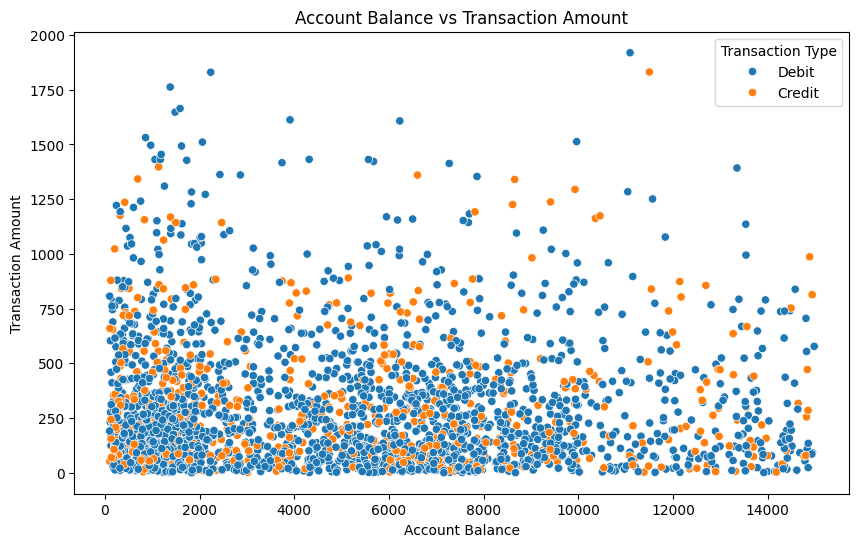

In [268]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data, x = "Account Balance", y = "Transaction Amount", hue = "Transaction Type")
plt.legend(title = "Transaction Type")
plt.title("Account Balance vs Transaction Amount")
plt.xlabel("Account Balance")
plt.ylabel("Transaction Amount")
plt.show()

**Correlation Analysis for Numeric Columns**

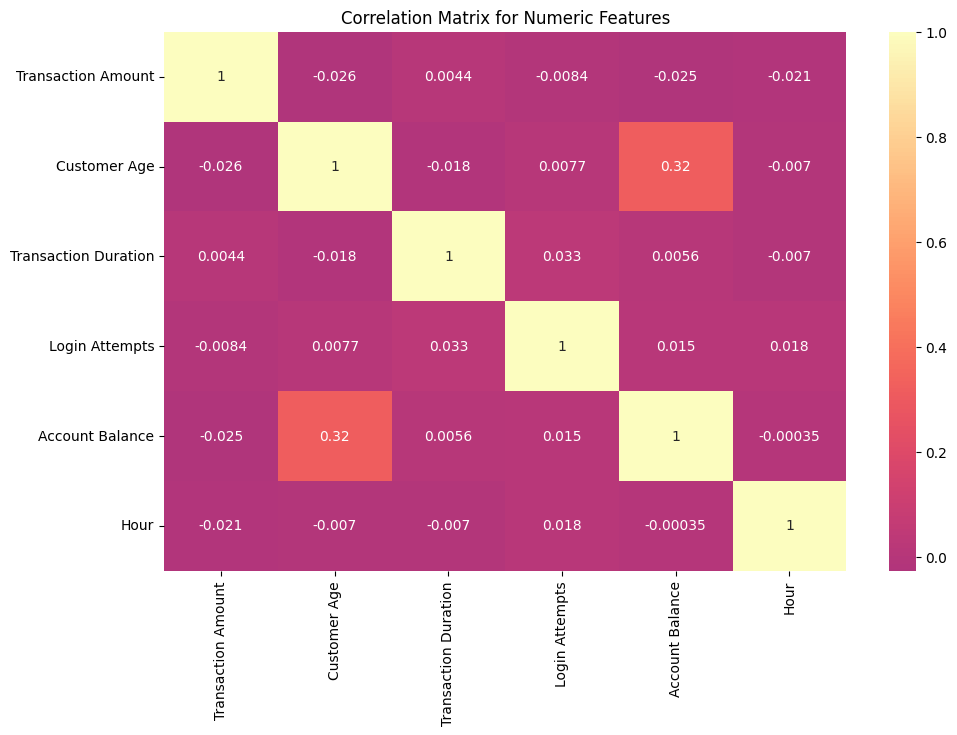

In [300]:
numeric_cols = data.select_dtypes(include = np.number).columns
correlation_matrix = data[numeric_cols].corr()
plt.figure(figsize = (11, 7))
sns.heatmap(correlation_matrix, annot = True, cmap = "magma", center = 0)
plt.title("Correlation Matrix for Numeric Features")
plt.show()

**Login Attempts vs Transaction Amount (Potential Fraud Indicator)**

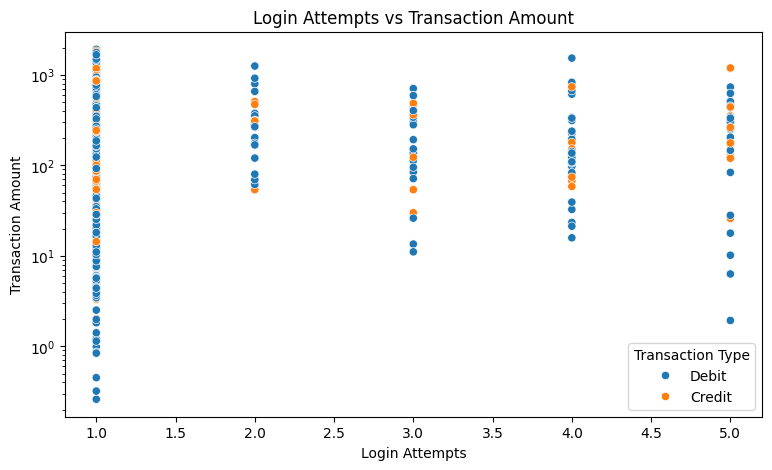

In [308]:
plt.figure(figsize = (9, 5))
sns.scatterplot(data, x = "Login Attempts", y = "Transaction Amount", hue = "Transaction Type")
plt.yscale("log")
plt.title("Login Attempts vs Transaction Amount")
plt.show()

**Time Gap Analysis (Transaction Frequency)**

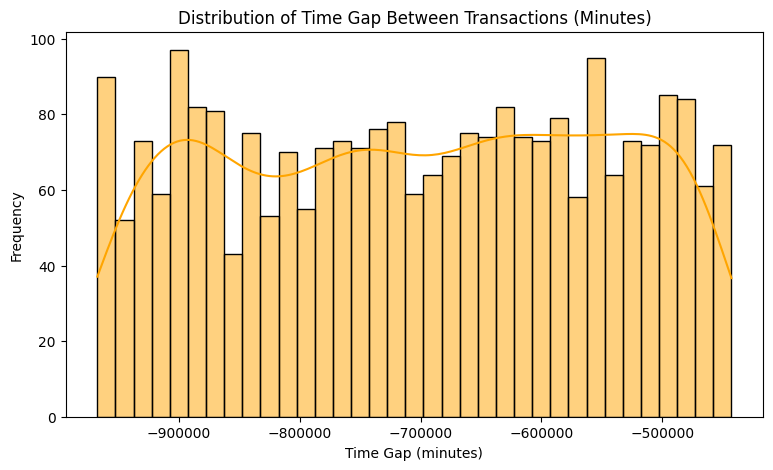

In [316]:
data["Previous Transaction Date"] = pd.to_datetime(data["Previous Transaction Date"])
data["Time Gap"] = (data["Transaction Date"] - data["Previous Transaction Date"]).dt.total_seconds() / 60
plt.figure(figsize = (9, 5))
sns.histplot(data, x = "Time Gap", bins = 35, kde = True, color = "orange")
plt.title("Distribution of Time Gap Between Transactions (Minutes)")
plt.xlabel("Time Gap (minutes)")
plt.ylabel("Frequency")
plt.show()

**Channel Usage Patterns**

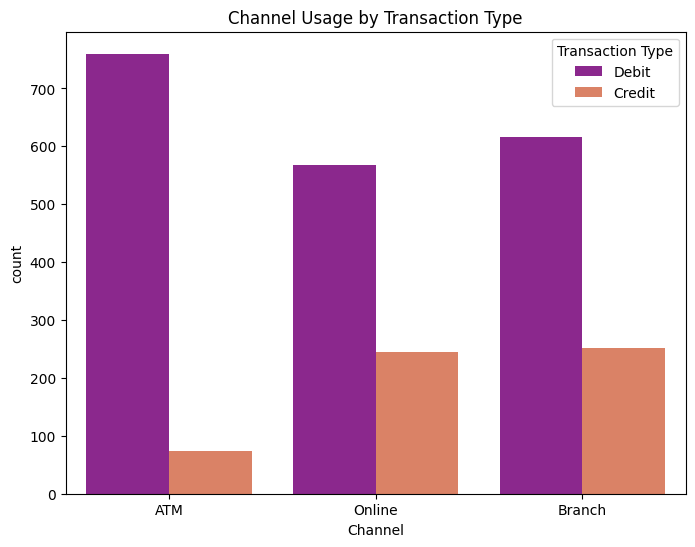

In [321]:
plt.figure(figsize=(8, 6))
sns.countplot(data, x = "Channel", hue = "Transaction Type", palette = "plasma")
plt.title("Channel Usage by Transaction Type")
plt.show()

**Device ID and IP Address Variation per Account (Anomaly Detection)**

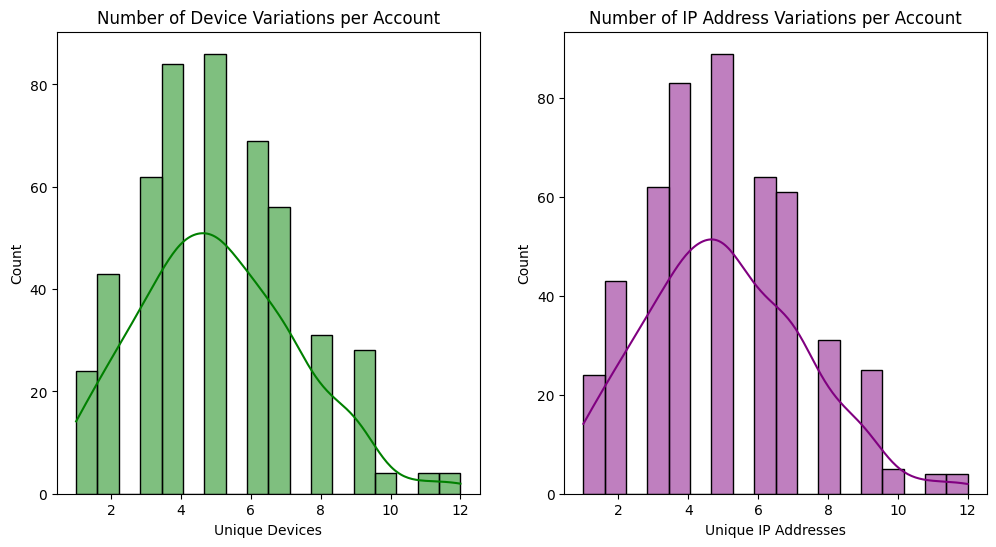

In [332]:
device_variations = data.groupby("Account ID")["Device ID"].nunique()
ip_variations = data.groupby("Account ID")["IP Address"].nunique()
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.histplot(device_variations, bins = 18, color = "green", kde = True)
plt.title("Number of Device Variations per Account")
plt.xlabel("Unique Devices")
plt.subplot(1, 2, 2)
sns.histplot(ip_variations, bins = 18, color = "purple", kde = True)
plt.title("Number of IP Address Variations per Account")
plt.xlabel("Unique IP Addresses")
plt.show()

**Analyze Account Balance vs Transaction Amount**

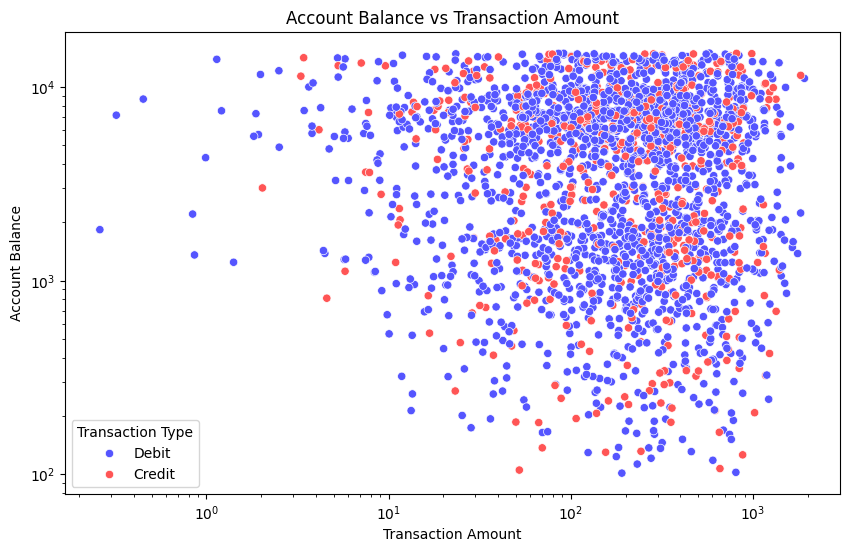

In [344]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x = "Transaction Amount", y = "Account Balance", hue = "Transaction Type", palette = "seismic")
plt.xscale("log")
plt.yscale("log")
plt.title("Account Balance vs Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Account Balance")
plt.show()

**Merchant Trends (Most Frequent Merchants)**

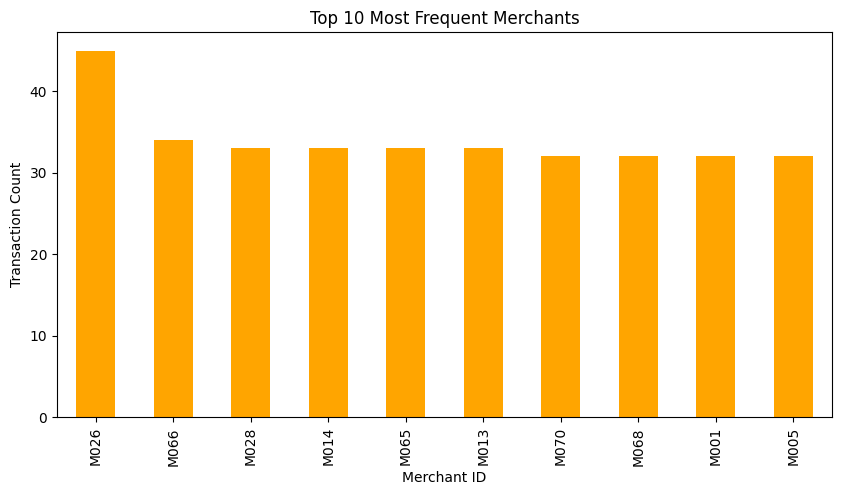

In [349]:
merchant_counts = data["Merchant ID"].value_counts().head(10)
plt.figure(figsize = (10, 5))
merchant_counts.plot(kind = "bar", color = "orange")
plt.title("Top 10 Most Frequent Merchants")
plt.xlabel("Merchant ID")
plt.ylabel("Transaction Count")
plt.show()

**Chi-Square Test of Independence (Categorical Relationship)**

In [351]:
contingency_table = pd.crosstab(data["Transaction Type"], data["Channel"])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print("\nChi-Square Test between Transaction Type and Channel")
print(f"Chi2 Statistic: {chi2}, p-value: {p}")


Chi-Square Test between Transaction Type and Channel
Chi2 Statistic: 136.90539694747218, p-value: 1.8679738038721596e-30


**The Chi-Square Test of Independence is a statistical test used to determine if there is a significant association between two categorical variables. It helps answer questions like, "Are gender and product preference related?" or "Is transaction type associated with customer location?"**
Since the p-value is so low, we can conclude with high confidence that there is a statistically significant association between TransactionType and Channel.

**Fraud Detection**

Number of potential frauds detected: 124


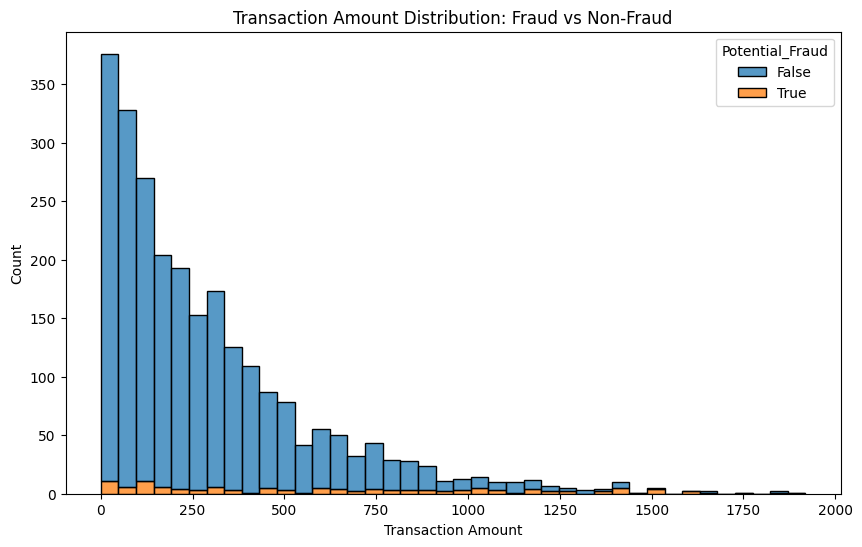

In [372]:
# 1. Define suspicious login attempts
data['High_Login Attempts'] = data['Login Attempts'] > 3

# 2. Flag unusually high transaction amount compared to customer's average
data['Avg Amount'] = data.groupby('Account ID')['Transaction Amount'].transform('mean')
data['High_Amount'] = data['Transaction Amount'] > (3 * data['Avg Amount'])

# 3. Transactions at odd hours (midnight - 4am)
data['Transaction Hour'] = pd.to_datetime(data['Transaction Date']).dt.hour
data['Odd_Hour'] = data['Transaction Hour'].between(0, 4)

# 4. Final Fraud Flag (if any of the above rules are true)
data['Potential_Fraud'] = data[['High_Login Attempts','High_Amount','Odd_Hour']].any(axis=1)

# Separate fraudulent and non-fraudulent transactions
frauds = data[data['Potential_Fraud']]
non_frauds = data[~data['Potential_Fraud']]

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")

# Plot: Fraud vs Non-Fraud transactions
plt.figure(figsize=(10,6))
sns.histplot(data, x="Transaction Amount", hue="Potential_Fraud", multiple="stack", bins=40)
plt.title("Transaction Amount Distribution: Fraud vs Non-Fraud")
plt.show()

**Most suspicious activity comes from online transactions with high login attempts and unusual locations. Fraud accounts for 3.5% of transactions.**